In [1]:
using Symbolics

In [2]:
function lorenz(dᵤ,u,p,t)
 dᵤ[1] = 10.0(u[2]-u[1])
 dᵤ[2] = u[1]*(28.0-u[3]) - u[2]
 dᵤ[3] = u[1]*u[2] - (8/3)*u[3]
end

lorenz (generic function with 1 method)

In [3]:
@variables t x(t) y(t) z(t) dx(t) dy(t) dz(t) σ ρ β
dᵤ = [dx,dy,dz]
u = [x,y,z]
p = [σ,ρ,β]
lorenz(dᵤ,u,p,t)

-2.6666666666666665z(t) + x(t)*y(t)

In [4]:
dᵤ

3-element Vector{Num}:
               10.0(-x(t) + y(t))
 -y(t) + x(t)*(28.0 - z(t))
               -2.6666666666666665z(t) + x(t)*y(t)

# References
- [ ] [Function Registration and Tracing](https://symbolics.juliasymbolics.org/stable/manual/functions/)

In [55]:
using LinearAlgebra
D = diagm(4, 5, 0 => fill(-1, 4), 1 => fill(1, 4))

4×5 Matrix{Int64}:
 -1   1   0   0  0
  0  -1   1   0  0
  0   0  -1   1  0
  0   0   0  -1  1

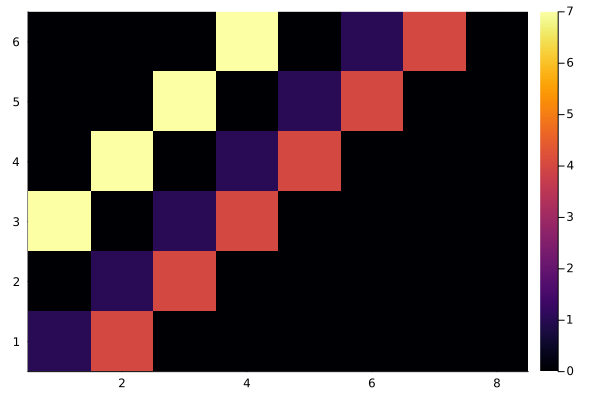

In [58]:
using Plots
heatmap(A)

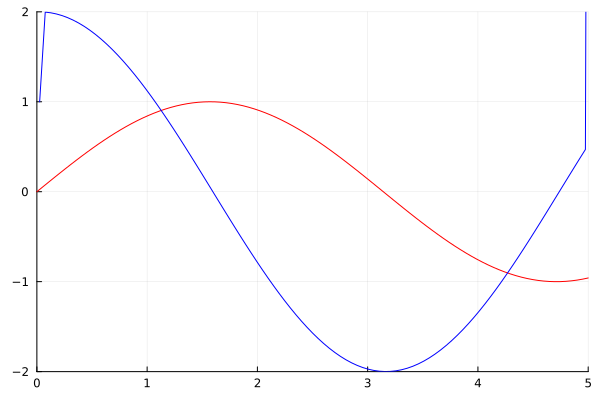

In [59]:
using Plots

a, b = 0, 5
n = 100
Δx = (b - a) / (n - 1)

x = range(a, b, length=n)
f = sin.(x)

# Create the central difference differentiation matrix
D = diagm(-1 => fill(-1/Δx, n-1), 1 => fill(1/Δx, n-1))

# Apply the matrix D to the function f
Df = D * f[1:end]

# Plot the original function and the derivative
plot(x, f, linecolor="red", linestyle=:solid, label="f", legend=:false)
# plot!(x[1:end-1] .+ Δx/2, Df, linecolor="blue", linestyle=:solid, label="D*f")
plot!(x[1:end] .+ Δx/2, Df, linecolor="blue", linestyle=:solid, label="D*f"
    , ylims = (-2,2)
    , xlims = (0, 5)
)

# References
- [ ] [18.06 Pset 1 Solutions](https://web.mit.edu/18.06/www/Fall2022/pset1sol.html)